<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/DATASETS/fraudTrain.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('/content/drive/MyDrive/DATASETS/fraudTest.csv', index_col='Unnamed: 0')

In [3]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


index - Unique Identifier for each row

trans_date_trans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class

In [4]:
#Change date type from obj to datetime
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

In [5]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['month'] = train_df['trans_date_trans_time'].dt.month
test_df['month'] = test_df['trans_date_trans_time'].dt.month

train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


In [6]:
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [7]:
train_df.shape

(1296675, 24)

In [8]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,month
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01,6.142150e+00
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00,3.417703e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00,3.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01,6.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01,9.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,1.200000e+01


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [10]:
train_df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<ipython-input-11-13631e56d41d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = train_df['is_fraud'], palette = 'ch:s=.25,rot=-.25')


<Axes: xlabel='is_fraud', ylabel='count'>

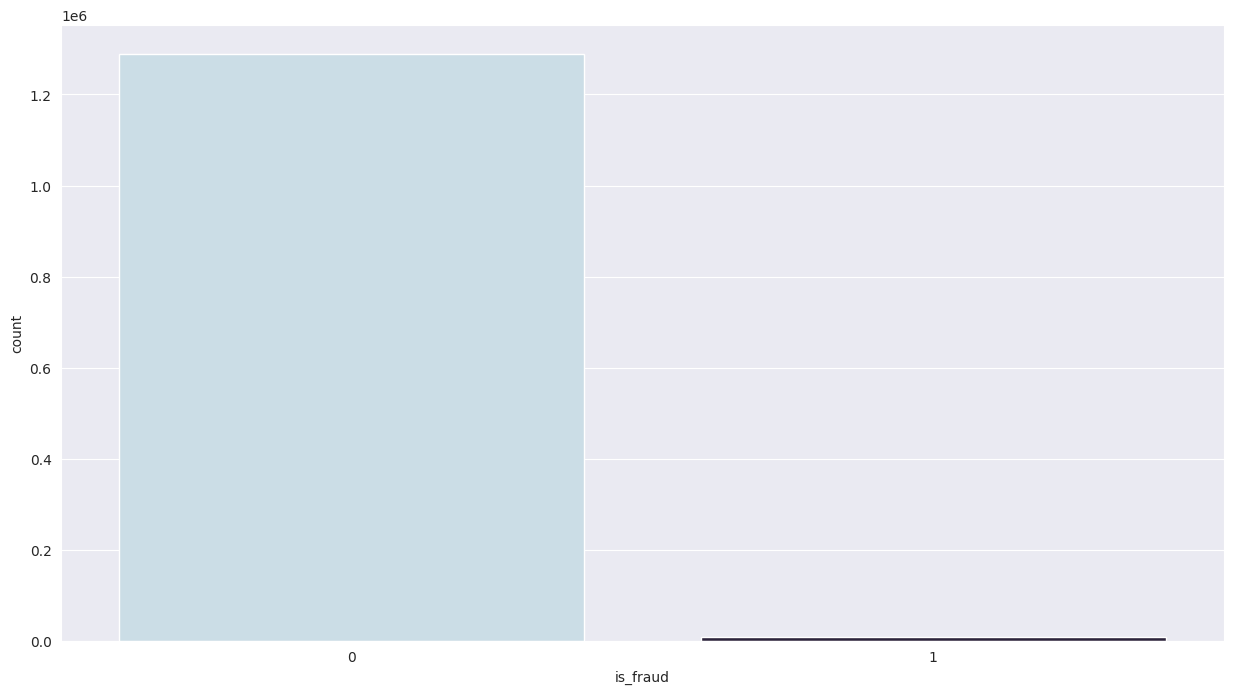

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x = train_df['is_fraud'], palette = 'ch:s=.25,rot=-.25')

<ipython-input-12-ed06696babf9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


<Axes: >

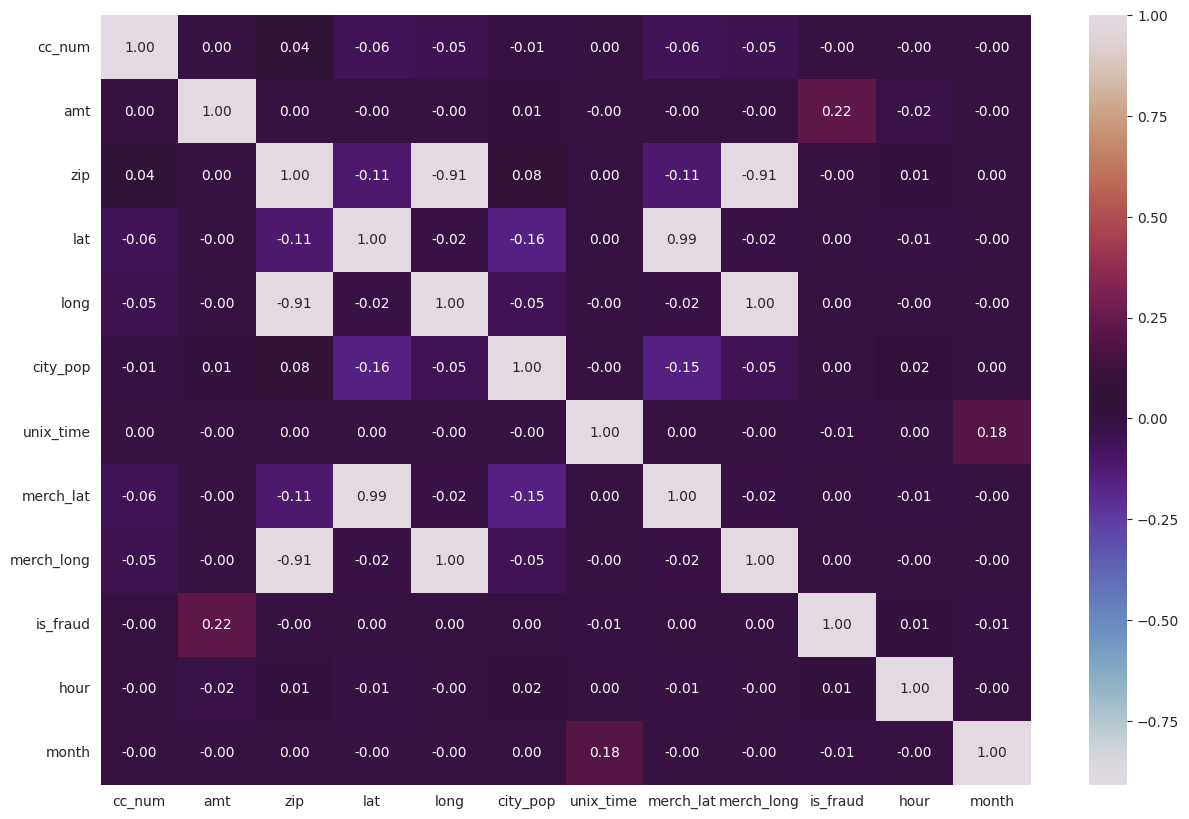

In [12]:
corr_matrix = train_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='twilight')

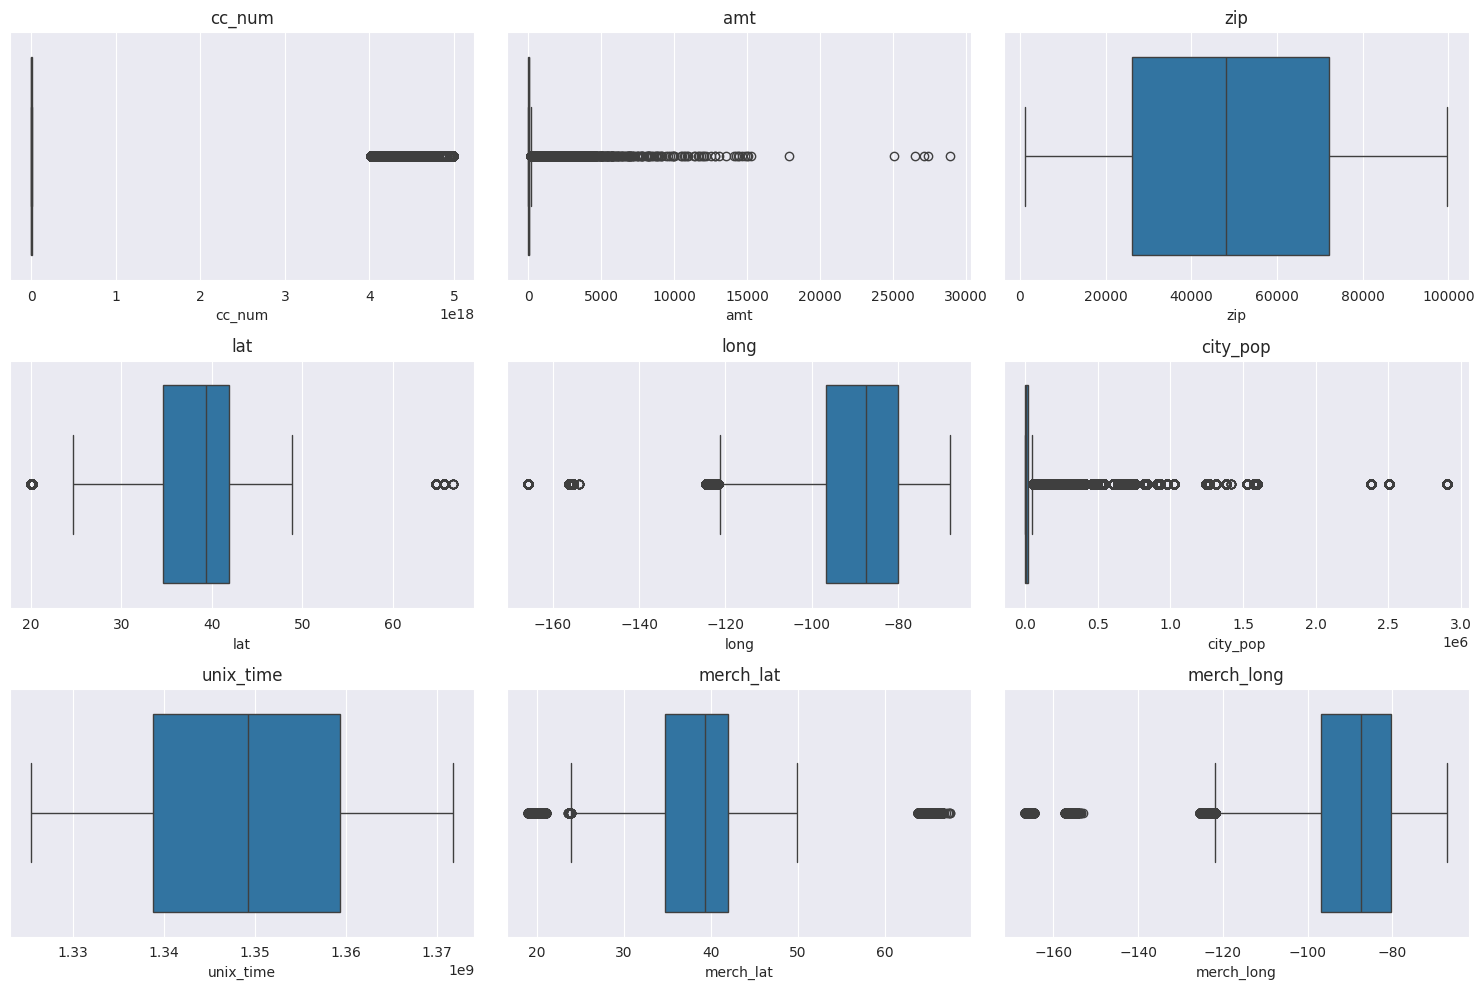

In [13]:
#outliers detection
int_vars = train_df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=train_df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [14]:
train_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour                     0
month                    0
dtype: int64

In [15]:
# remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [16]:
#clean merchant column
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [17]:
train_df.head()

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,Lind-Buckridge,entertainment,220.11,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1
3,"Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1
4,Keeling-Crist,misc_pos,41.96,Garcia,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1


WOEEncoder

is a type of categorical encoding technique used in machine learning, particularly in the context of handling categorical variables in predictive modeling tasks, such as classification. WOE stands for "Weight of Evidence." It's a popular encoding technique in credit scoring and fraud detection.

In summary, while label encoding simply assigns numerical labels to categories, WOE encoding calculates numerical values based on the relationship between each category and the target variable, providing more meaningful representations for categorical variables in certain modeling contexts, especially those where the predictive power of categorical variables is crucial.

In [18]:
!pip install category_encoders
from category_encoders import WOEEncoder
# applying label encoding
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    train_df[col] = WOEEncoder().fit_transform(train_df[col],train_df['is_fraud'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [19]:
train_df.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1
2,-0.790166,-0.847622,220.11,0.433257,1,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1


as our data is imbalanced we will use Resampling Techniques

down_sampling technique :

Downsampling involves reducing the number of instances in the majority class to balance it with the number of instances in the minority class.

This helps prevent the machine learning model from being biased towards the majority class and improves its ability to learn patterns from the minority class.

In [20]:
from sklearn.utils import resample
No_class = train_df[train_df["is_fraud"]==0]
yes_class = train_df[train_df["is_fraud"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)


X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

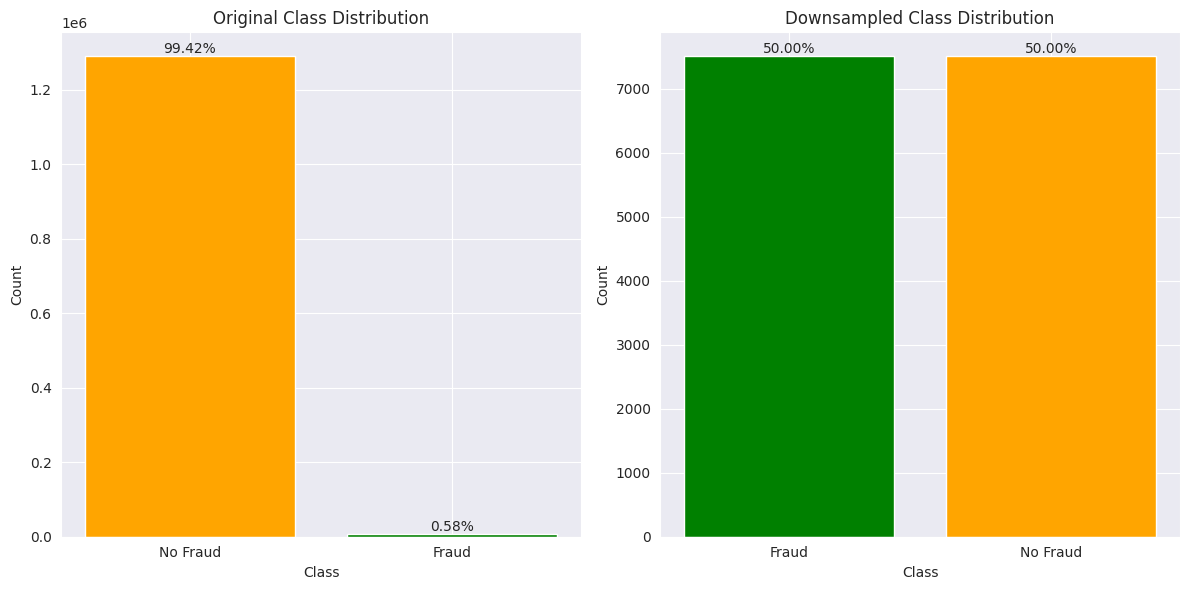

In [21]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

In [22]:
X_train.shape

(12009, 13)

In [23]:
y_train.shape

(12009,)

In [24]:
print(np.isnan(X_train).any())
print(np.isnan(y_train).any())

False
False


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [26]:
print(np.isnan(X_train).any())
print(np.isnan(y_train).any())

False
False


In [27]:
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

ADAM

In [28]:
from tensorflow.keras.optimizers import SGD, Adam

In [40]:
#train the model
model = Sequential()
# Input layer
model.add(Dense(32, input_shape=(13,), activation='relu')),
model.add(Dropout(0.2)),
# Hidden layer
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

In [42]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)

In [43]:
history = model.fit(X_train, y_train, epochs=6, batch_size=5, validation_split=0.15, verbose=0, callbacks=[earlystopper])
history_dict = history.history

Text(0.5, 0, 'Epochs')

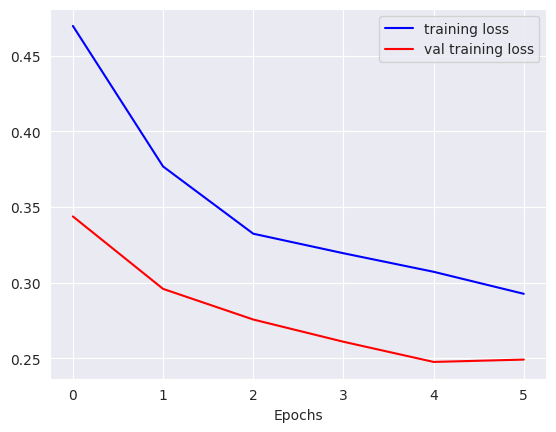

In [44]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

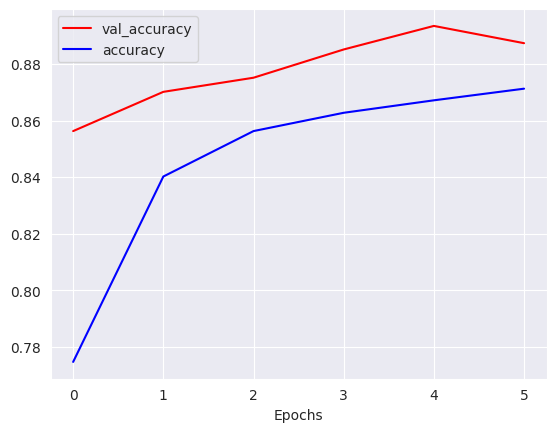

In [45]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [46]:
#predictions
y_pred = model.predict(X_test)

94/94 [==============================] - 1s 5ms/step


In [48]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [49]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_binary))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_binary))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_binary))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_binary))

Accuracy Neural Net: 0.8991008991008991
Precision Neural Net: 0.9157534246575343
Recall Neural Net: 0.8813447593935398
F1 Score Neural Net: 0.8982196842458852


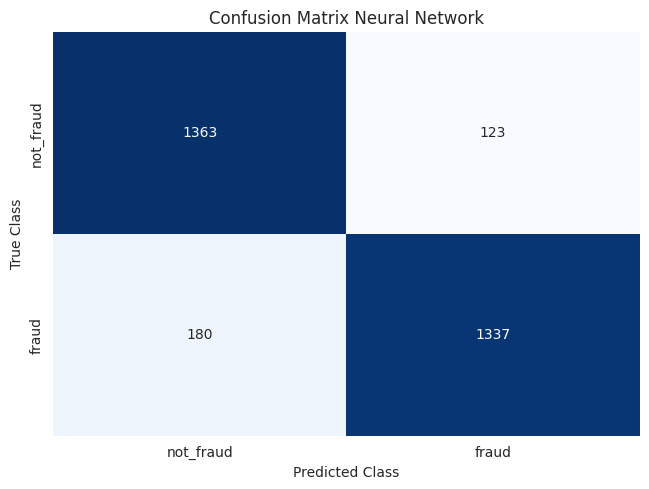

In [50]:
#CM matrix
matrix_nn = confusion_matrix(y_test, y_pred_binary)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [52]:
# Predicted probabilities
y_pred_nn_proba = model.predict(X_test)

# Compute ROC curve and ROC-AUC score
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)

# Print AUC score
print('AUC Neural Net:', auc_keras)

94/94 [==============================] - 0s 3ms/step
AUC Neural Net: 0.9698433456270832


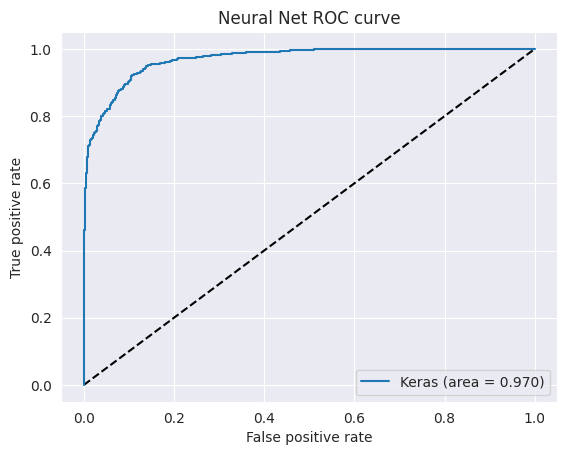

In [53]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

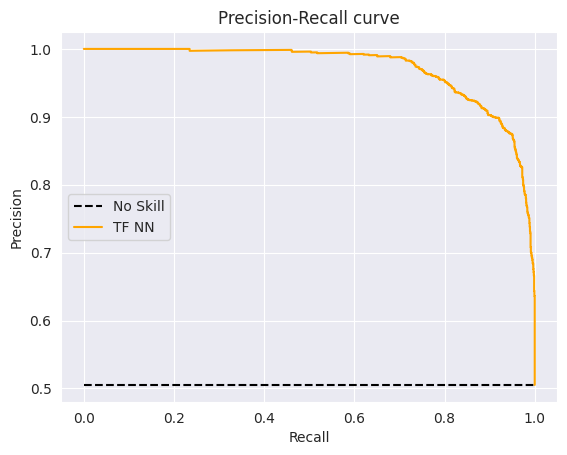

In [54]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

STOCHASTIC GRADIENT DESCENT WITH MOMENTUM

In [91]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [92]:
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [93]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)

In [95]:
history = model.fit(X_train, y_train, epochs=6, batch_size=5, validation_split=0.15, verbose=0, callbacks=[earlystopper])
history_dict2 = history.history

Text(0.5, 0, 'Epochs')

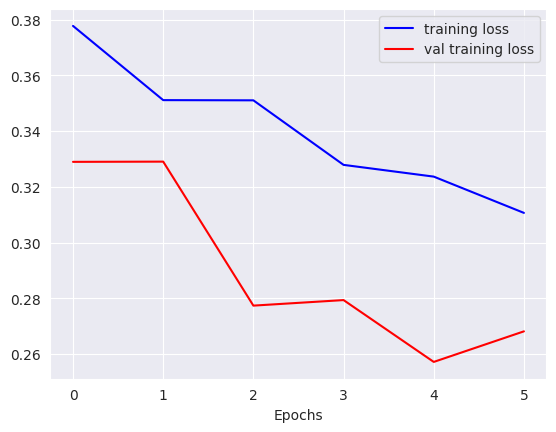

In [96]:
loss_values2 = history_dict2['loss']
val_loss_values2=history_dict2['val_loss']
plt.plot(loss_values2,'b',label='training loss')
plt.plot(val_loss_values2,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

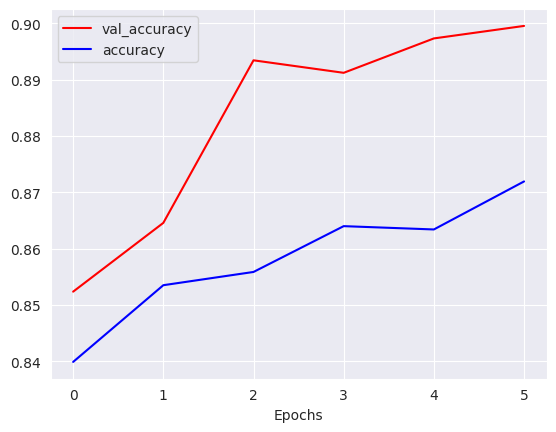

In [97]:
accuracy_values2 = history_dict2['accuracy']
val_accuracy_values2=history_dict2['val_accuracy']
plt.plot(val_accuracy_values2,'-r',label='val_accuracy')
plt.plot(accuracy_values2,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [98]:
#predictions
y_pred2 = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [99]:
y_pred_binary2 = (y_pred2 > 0.5).astype(int)

In [100]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_binary2))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_binary2))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_binary2))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_binary2))

Accuracy Neural Net: 0.9150849150849151
Precision Neural Net: 0.9424964936886395
Recall Neural Net: 0.8859591298615689
F1 Score Neural Net: 0.9133537206931702


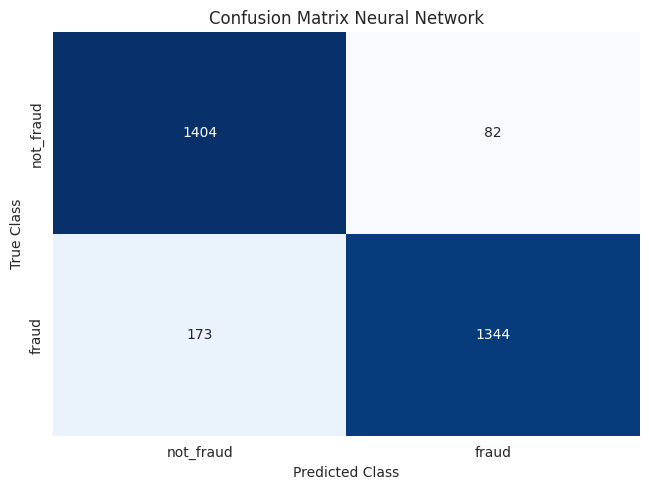

In [101]:
#CM matrix
matrix_nn = confusion_matrix(y_test, y_pred_binary2)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [102]:
# Predicted probabilities
y_pred_nn_proba2 = model.predict(X_test)

# Compute ROC curve and ROC-AUC score
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_nn_proba2)
auc_keras2 = auc(fpr_keras, tpr_keras)

# Print AUC score
print('AUC Neural Net:', auc_keras2)

94/94 [==============================] - 1s 12ms/step
AUC Neural Net: 0.9707609408311899


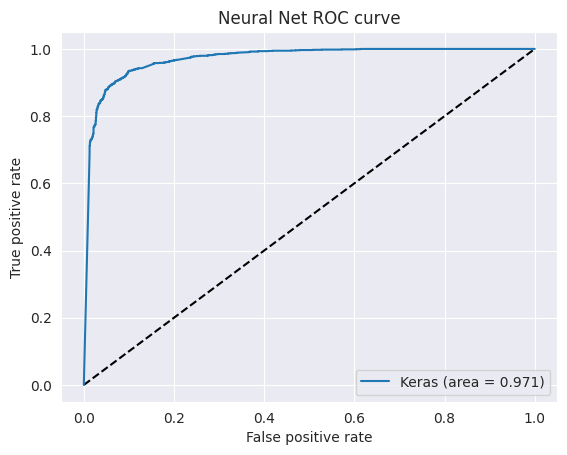

In [103]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

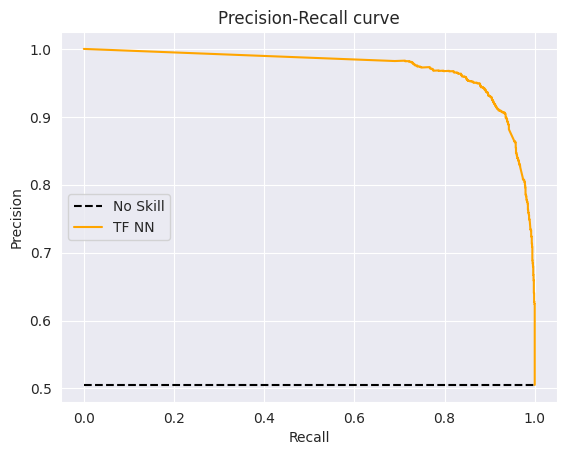

In [104]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba2)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

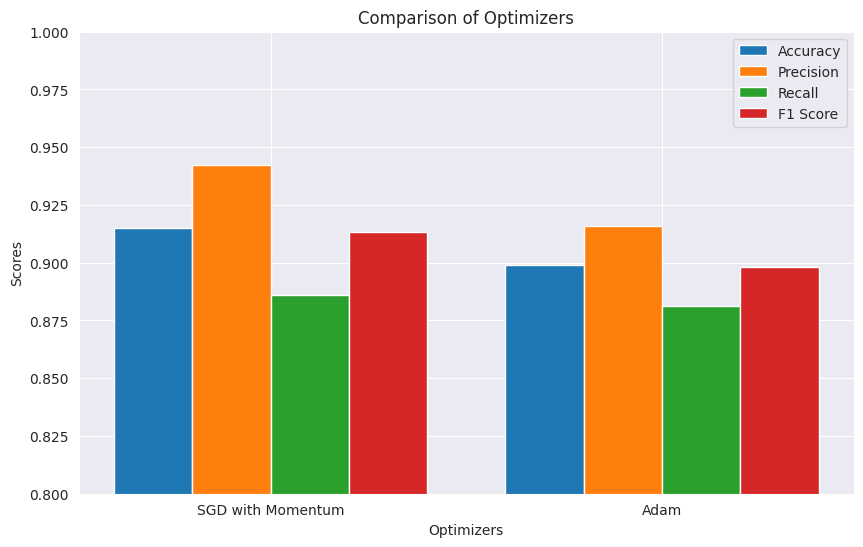

In [106]:
optimizers = ['SGD with Momentum', 'Adam']
accuracy = [0.9150849150849151, 0.8991008991008991]
precision = [0.9424964936886395, 0.9157534246575343]
recall = [0.8859591298615689, 0.8813447593935398]
f1_score = [0.9133537206931702, 0.8982196842458852]

# Plotting
bar_width = 0.2
index = np.arange(len(optimizers))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Optimizers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Optimizers')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(optimizers)
ax.legend()
ax.set_ylim(0.8, 1.0)
plt.show()


SGD with Momentum:

Accuracy: 0.9151
Precision: 0.9425
Recall: 0.8860
F1 Score: 0.9134

Adam:

Accuracy: 0.8991
Precision: 0.9158
Recall: 0.8813
F1 Score: 0.8982

Inference:

SGD with Momentum generally outperforms Adam across all metrics (Accuracy, Precision, Recall, F1 Score).

This suggests that, for the specific task or dataset, the SGD optimizer with momentum was more effective in achieving better model performance.